In [1]:
# Other imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sionna.rt

no_preview = True # Toggle to False to use the preview widget


# Import relevant components from Sionna RT
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, RadioMapSolver, subcarrier_frequencies

In [2]:
scene = load_scene(sionna.rt.scene.simple_street_canyon_with_cars, merge_shapes=False)


# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="tr38901",
                             polarization="V")

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="dipole",
                             polarization="cross")

# Create transmitter
tx = Transmitter(name="tx",
                 position=[15,21,-5],
                 display_radius=2)

# Add transmitter instance to scene
scene.add(tx)

# Create a receiver
rx = Receiver(name="rx",
              position=[45,90,1.5],
              display_radius=2)

# Add receiver instance to scene
scene.add(rx)

tx.look_at(rx) # Transmitter points towards receiver

In [3]:
# Instantiate a path solver
# The same path solver can be used with multiple scenes
#p_solver  = PathSolver()

# Compute propagation paths
#paths = p_solver(scene=scene,
                 #max_depth=5,
                 #los=True,
                 #specular_reflection=True,
                 #diffuse_reflection=False,
                 #refraction=True,
                 #synthetic_array=False,
                 #seed=41)

#scene.preview(paths=paths)

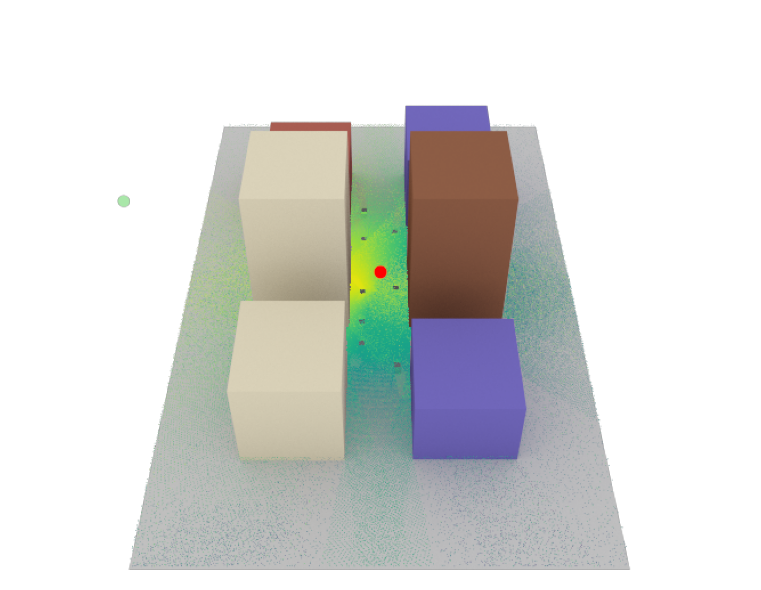

In [ ]:

import math 
import time
rm_solver = RadioMapSolver()



my_cam = Camera(position=[-200,0,200], look_at=[0,0,0])


time_step = 0
original_postion = np.array([0, 0, 10])
while time_step < 100:
    tx.position = original_postion + np.array([math.sin(time_step * 0.2)*20, math.sin(time_step * 0.3)*50, math.sin(time_step*0.59)*15])
    time_step += 1
    rm = rm_solver(scene=scene,
               max_depth=5,
               cell_size=[0.1,0.1],
               samples_per_tx=10**6)
    scene.render(camera=my_cam, radio_map=rm, resolution=[650, 500], num_samples=1024)
